C:\Users\girim\OneDrive\Desktop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# pip install imblearn
from imblearn.over_sampling import SMOTE

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#dataset=pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv') 
#dataset.head(10)

In [4]:
dataset=pd.read_csv(r'C:\Users\girim\OneDrive\Desktop\heart_2020_cleaned.csv') 
dataset.head(10)




,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

We have total 18 columns in the dataset and the Target column is Heart Disease. 

In [6]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
dataset.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

From the above we came to know there is no Null value so we dont need to do imputation to fill Missing values.

In [8]:
dataset['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In the Above we see the Target column HeartDisease has 2 values  Yes and No But we have more No as compared to Yes. We can Infer that the dataset is unbalanced

In [9]:
dataset['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [10]:
dataset['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [11]:
dataset['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [12]:
dataset.PhysicalHealth.value_counts()

# dataset['PhysicalHealth'].plot(kind = 'bar')

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [13]:
dataset.shape

(319795, 18)

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# dataset_copy = dataset.copy() #We create a copy so we can still refer to the original dataframe later
# scaler = MinMaxScaler()

# X_scaled = pd.DataFrame(scaler.fit_transform(dataset_copy), columns=['BMI','PhysicalHealth','MentalHealth','SleepTime'])
# X_scaled.head()

In [15]:
df_max_scaled = dataset.copy()
  
# apply normalization techniques on Column 1
column = 'PhysicalHealth'
column2='BMI'
column3 = 'MentalHealth'
column4='SleepTime'
dataset[column] = (df_max_scaled[column]-df_max_scaled[column].min()) /(df_max_scaled[column].max()-df_max_scaled[column].min())
dataset[column2] = (df_max_scaled[column2]-df_max_scaled[column].min()) /(df_max_scaled[column2].max()-df_max_scaled[column2].min())
dataset[column3] = (df_max_scaled[column3]-df_max_scaled[column].min()) /(df_max_scaled[column3].max()-df_max_scaled[column3].min())
dataset[column4] = (df_max_scaled[column4]-df_max_scaled[column4].min()) /(df_max_scaled[column4].max()-df_max_scaled[column4].min())
  
# view normalized data
display(dataset)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.200410,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.245563,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.320898,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.292285,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.286249,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,0.330919,Yes,No,No,0.233333,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,0.217391,Yes,No,No
319791,No,0.360256,Yes,No,No,0.000000,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,0.173913,Yes,No,No
319792,No,0.292648,No,No,No,0.000000,0.0,No,Female,45-49,Hispanic,No,Yes,Good,0.217391,No,No,No
319793,No,0.396113,No,No,No,0.000000,0.0,No,Female,25-29,Hispanic,No,No,Good,0.478261,No,No,No


In [16]:
# from sklearn.preprocessing import MinMaxScaler
# dataset_copy = dataset.copy() #We create a copy so we can still refer to the original dataframe later
# scaler = MinMaxScaler()
# X_columns = X.columns
# X_scaled = pd.DataFrame(scaler.fit_transform(dataset_copy), columns=['BMI','PhysicalHealth'])
# X_scaled.head()

In [17]:
dataset.shape

(319795, 18)

In [18]:
dataset['PhysicalHealth'].value_counts()



0.000000    226589
1.000000     19509
0.066667     14880
0.033333     10489
0.100000      8617
0.166667      7606
0.333333      5453
0.500000      5012
0.233333      4629
0.133333      4468
0.666667      3216
0.466667      2893
0.200000      1270
0.833333      1164
0.266667       924
0.700000       626
0.400000       605
0.933333       446
0.966667       204
0.300000       180
0.600000       167
0.533333       135
0.900000       124
0.566667       110
0.433333        91
0.733333        89
0.366667        85
0.800000        67
0.866667        66
0.766667        46
0.633333        35
Name: PhysicalHealth, dtype: int64

<AxesSubplot:>

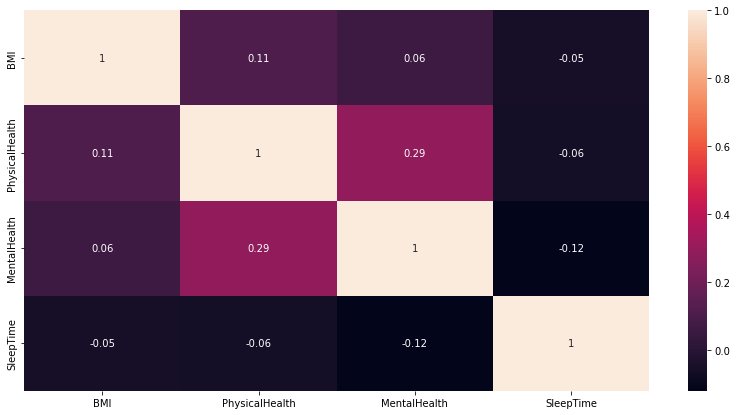

In [19]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

In [20]:
# df_max_scaled = dataset.copy()
  
# # apply normalization techniques on Column 1
# column = 'PhysicalHealth'
# df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
  
# # view normalized data
# display(df_max_scaled)

In [21]:
Bin_variables = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke","DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.str.upper())


In [22]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,NO,0.200410,YES,NO,NO,0.100000,1.0,NO,Female,55-59,White,Yes,YES,Very good,0.173913,YES,NO,YES
1,NO,0.245563,NO,NO,YES,0.000000,0.0,NO,Female,80 or older,White,No,YES,Very good,0.260870,NO,NO,NO
2,NO,0.320898,YES,NO,NO,0.666667,1.0,NO,Male,65-69,White,Yes,YES,Fair,0.304348,YES,NO,NO
3,NO,0.292285,NO,NO,NO,0.000000,0.0,NO,Female,75-79,White,No,NO,Good,0.217391,NO,NO,YES
4,NO,0.286249,NO,NO,NO,0.933333,0.0,YES,Female,40-44,White,No,YES,Very good,0.304348,NO,NO,NO


In [23]:
dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.map({'YES':1,'NO':0}))

In [24]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,Female,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,Female,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,Male,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,Female,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,Female,40-44,White,No,1,Very good,0.304348,0,0,0


In [25]:
dataset['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [26]:
dataset.replace(('Male','Female'),(1,0),inplace=True)
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,40-44,White,No,1,Very good,0.304348,0,0,0


In [27]:
dataset.MentalHealth.value_counts()


0.000000    205401
1.000000     17373
0.066667     16495
0.166667     14149
0.333333     10513
0.100000     10466
0.500000      9896
0.033333      9291
0.233333      5528
0.666667      5431
0.133333      5379
0.466667      2048
0.833333      1954
0.200000      1510
0.266667      1094
0.400000       757
0.933333       515
0.700000       352
0.966667       317
0.600000       211
0.300000       203
0.533333       152
0.566667       128
0.900000       126
0.433333       110
0.733333        98
0.366667        83
0.766667        68
0.800000        67
0.866667        59
0.633333        21
Name: MentalHealth, dtype: int64

In [28]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Diabetic']= label_encoder.fit_transform(dataset['Diabetic'])
dataset['AgeCategory']= label_encoder.fit_transform(dataset['AgeCategory'])
dataset['Race']= label_encoder.fit_transform(dataset['Race'])
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,Very good,0.304348,0,0,0


In [29]:
# from sklearn.preprocessing import OneHotEncoder 
# enc = OneHotEncoder() 

# # Encoding categorical features 
# categ = dataset[['AgeCategory', 'Race', 'GenHealth']]
# encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())


# #Likning the encoed_cateh with the df
# df = pd.concat([dataset, encoded_categ], axis = 1)

# dataset.head(10)

# # # Dropping the categorical features
# # dataset = dataset.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)


In [30]:
dataset.AgeCategory.value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

In [31]:
dataset.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [32]:
d1=['GenHealth']
dataset[d1] = dataset[d1].apply(lambda x: x.map({'Very good':3,'Good':2,'Excellent':4,'Fair':1,'Poor':0}))
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,3,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,3,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,3,0.304348,0,0,0


<AxesSubplot:>

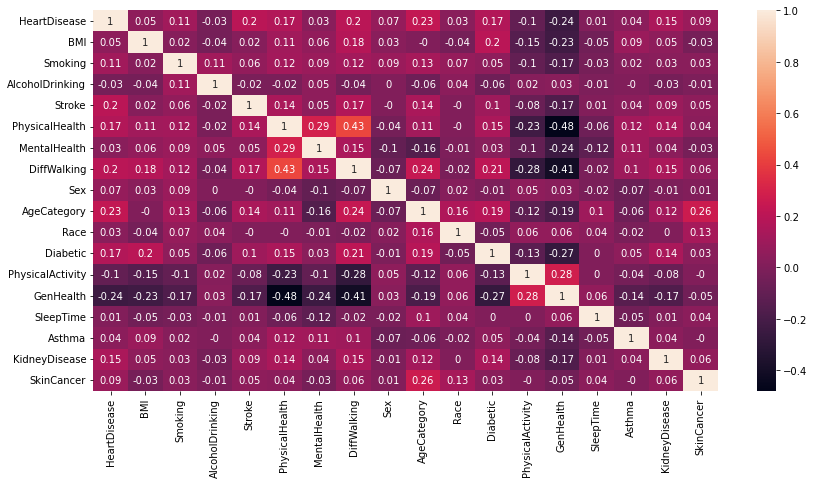

In [33]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

In [34]:
dataset['HeartDisease'].value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

In [35]:
X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']



In [36]:
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# print(X_res)

In [37]:
# print(Counter(y_res).items())
# print(y_res.shape)

In [38]:
dataset['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [39]:
X1 = dataset.drop(['HeartDisease'], axis=1)
y1 = dataset['HeartDisease']

As the dataset is imbalanaced we use random over sampler to balance the data set


SVM Add from here

In [40]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=101,replacement=True)
X, y = sm.fit_resample(X1, y1)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30)

In [42]:
from sklearn.svm import SVC
svmmodel = SVC(gamma='auto',kernel='rbf')
svmmodel.fit(X_train, y_train)

SVC(gamma='auto')

In [43]:
y_pred = svmmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[87622    93]
 [ 8040   184]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87715
           1       0.66      0.02      0.04      8224

    accuracy                           0.92     95939
   macro avg       0.79      0.51      0.50     95939
weighted avg       0.89      0.92      0.88     95939



In [44]:
# print(svmmodel.get_params())

C:\Users\girim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


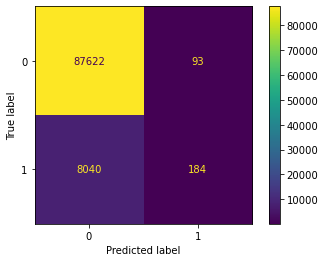

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svmmodel, X_test, y_test)  
plt.show()

In [46]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier

# pipeline = make_pipeline(StandardScaler(), SVC(kernel='poly'))
# strtfdKFold = StratifiedKFold(n_splits=5)
# kfold = strtfdKFold.split(X_train, y_train)
# scores = []
# #
# #
# #
# for k, (train, test) in enumerate(kfold):
#     pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
#     score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
#     scores.append(score)
#     print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
# print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))




In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=5, random_state=0).fit(X1, y1)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear','poly']}
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
 
# # fitting the model for grid search
# grid.fit(X_train, y_train)

In [ ]:
#  print(grid.best_params_)
 

#  print(grid.best_estimator_)